Project: Analyzing Volatility On 3 Stock Indices: S&P500, DAX40 & STI30

Stage One: Import The Libraries Needed, Clean & Format The Data

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
from datetime import datetime, timedelta

In [2]:
startdate = datetime(2019, 1, 1)
enddate = datetime(2024, 5, 25)

In [3]:
us_stock_data = yf.Ticker("^GSPC")
eu_stock_data = yf.Ticker("^GDAXI")
asia_stock_data = yf.Ticker("^STI")

In [4]:
us_stock_close = us_stock_data.history(start=startdate, end=enddate)['Close']
eu_stock_close = eu_stock_data.history(start=startdate, end=enddate)['Close']
asia_stock_close = asia_stock_data.history(start=startdate, end=enddate)['Close']

In [5]:
us_stock_close_df = pd.DataFrame({'Date': us_stock_close.index, 'S&P 500 (US)': us_stock_close.values}, index=us_stock_close.index)
eu_stock_close_df = pd.DataFrame({'Date': eu_stock_close.index, 'DAX (EU)': eu_stock_close.values}, index= eu_stock_close.index)
asia_stock_close_df = pd.DataFrame({'Date': asia_stock_close.index, 'STI (Asia)': asia_stock_close.values}, index=asia_stock_close.index)

In [6]:
size_us = us_stock_close_df.values.shape
size_eu = eu_stock_close_df.values.shape
size_asia = asia_stock_close_df.values.shape

print("Size of S&P500 Data:", size_us)
print("Size of DAX40 Data:", size_eu)
print("Size of STI30 Data:", size_us)

Size of S&P500 Data: (1359, 2)
Size of DAX40 Data: (1373, 2)
Size of STI30 Data: (1359, 2)


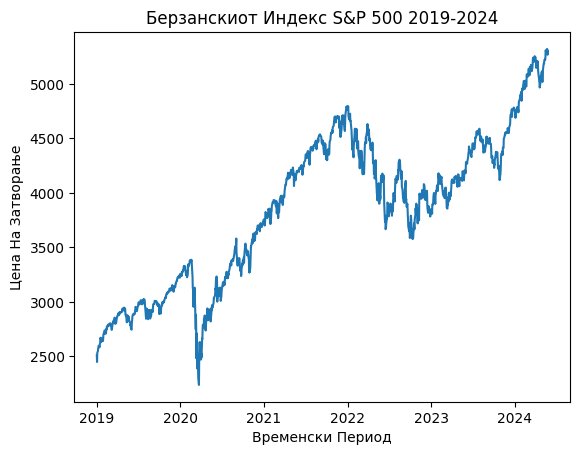

In [7]:
plt.plot(us_stock_close_df.index, us_stock_close_df['S&P 500 (US)'])
plt.title('Берзанскиот Индекс S&P 500 2019-2024')
plt.xlabel('Временски Период')
plt.ylabel('Цена На Затворање')
plt.show()

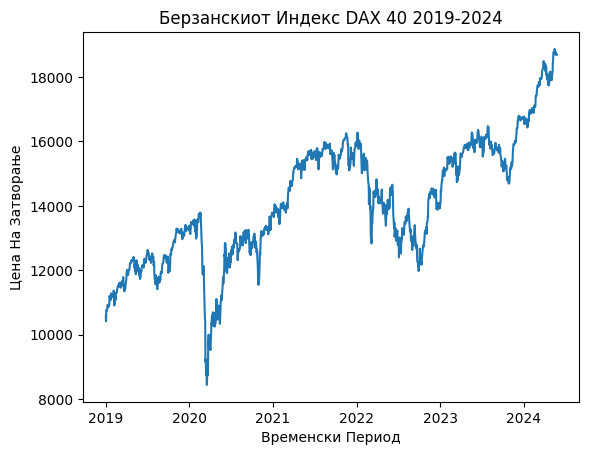

In [8]:
plt.plot(eu_stock_close_df.index, eu_stock_close_df['DAX (EU)'])
plt.title('Берзанскиот Индекс DAX 40 2019-2024')
plt.xlabel('Временски Период')
plt.ylabel('Цена На Затворање')
plt.show()

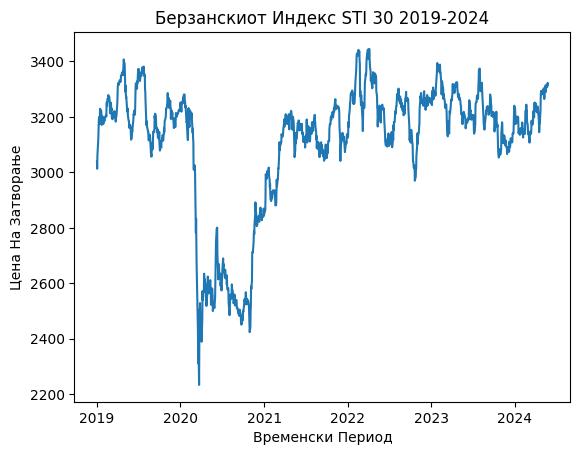

In [9]:
plt.plot(asia_stock_close_df.index, asia_stock_close_df['STI (Asia)'])
plt.title('Берзанскиот Индекс STI 30 2019-2024')
plt.xlabel('Временски Период')
plt.ylabel('Цена На Затворање')
plt.show()

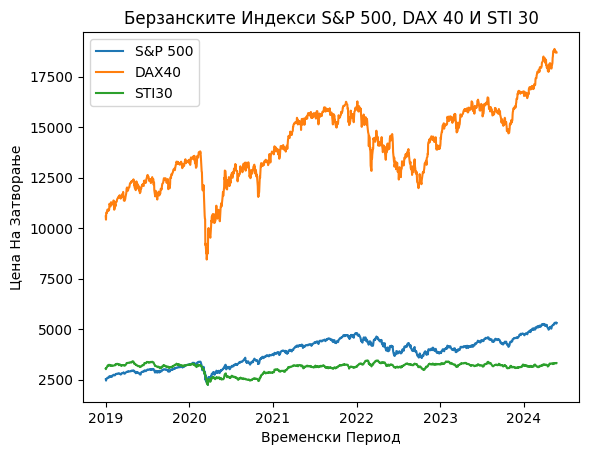

In [10]:
plt.plot(us_stock_close_df.index, us_stock_close_df['S&P 500 (US)'], label='S&P 500')
plt.plot(eu_stock_close_df.index, eu_stock_close_df['DAX (EU)'], label='DAX40')
plt.plot(asia_stock_close_df.index, asia_stock_close_df['STI (Asia)'], label='STI30')

plt.title('Берзанските Индекси S&P 500, DAX 40 И STI 30')
plt.xlabel('Временски Период')
plt.ylabel('Цена На Затворање')
plt.legend()

In [11]:
us_stock_close_df['Returns'] = us_stock_close_df['S&P 500 (US)'].pct_change().dropna()
eu_stock_close_df['Returns'] = eu_stock_close_df['DAX (EU)'].pct_change().dropna()
asia_stock_close_df['Returns'] = asia_stock_close_df['STI (Asia)'].pct_change().dropna()

In [12]:
us_stock_close_df = us_stock_close_df.drop(columns=['S&P 500 (US)'])
eu_stock_close_df = eu_stock_close_df.drop(columns=['DAX (EU)'])
asia_stock_close_df = asia_stock_close_df.drop(columns=['STI (Asia)'])
us_stock_close_df = us_stock_close_df.dropna()
eu_stock_close_df = eu_stock_close_df.dropna()
asia_stock_close_df = asia_stock_close_df.dropna()

In [13]:
missing_us = us_stock_close_df.isnull().sum()
missing_eu = eu_stock_close_df.isnull().sum()
missing_asia = asia_stock_close_df.isnull().sum()

print("Missing Values In S&P500:", missing_us)
print("Missing Values In DAX40:", missing_eu)
print("Missing Values In STI30:", missing_asia)

Missing Values In S&P500: Date       0
Returns    0
dtype: int64
Missing Values In DAX40: Date       0
Returns    0
dtype: int64
Missing Values In STI30: Date       0
Returns    0
dtype: int64


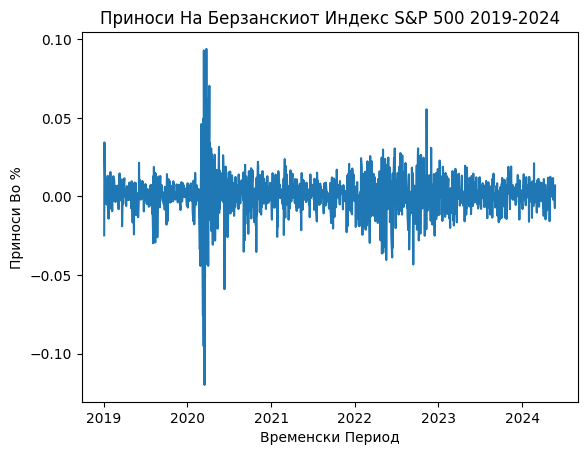

In [14]:
plt.plot(us_stock_close_df.index, us_stock_close_df['Returns'])
plt.title('Приноси На Берзанскиот Индекс S&P 500 2019-2024')
plt.xlabel('Временски Период')
plt.ylabel('Приноси Во %')
plt.show()

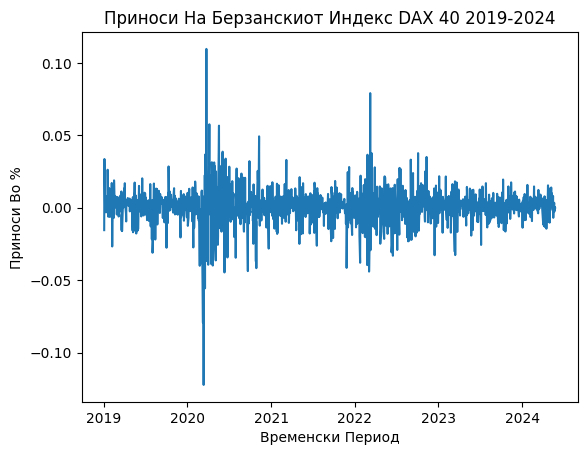

In [15]:
plt.plot(eu_stock_close_df.index, eu_stock_close_df['Returns'])
plt.title('Приноси На Берзанскиот Индекс DAX 40 2019-2024')
plt.xlabel('Временски Период')
plt.ylabel('Приноси Во %')
plt.show()

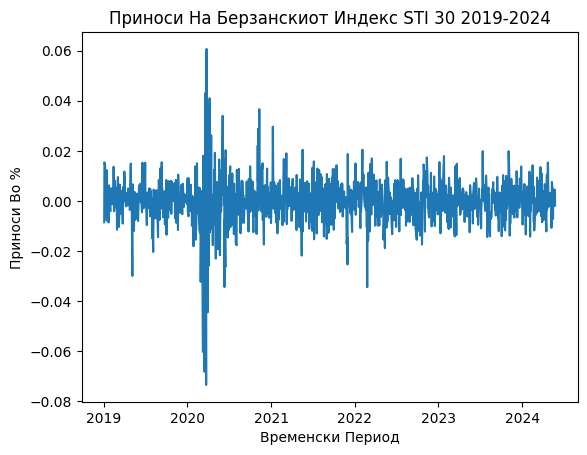

In [16]:
plt.plot(asia_stock_close_df.index, asia_stock_close_df['Returns'])
plt.title('Приноси На Берзанскиот Индекс STI 30 2019-2024')
plt.xlabel('Временски Период')
plt.ylabel('Приноси Во %')
plt.show()

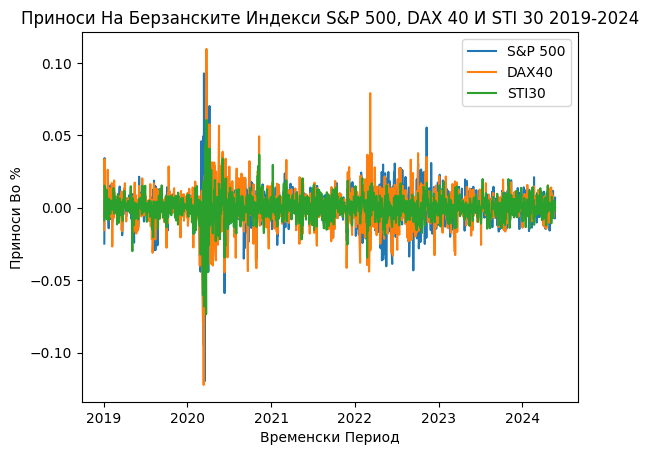

In [17]:
plt.plot(us_stock_close_df.index, us_stock_close_df['Returns'], label='S&P 500')
plt.plot(eu_stock_close_df.index, eu_stock_close_df['Returns'], label='DAX40')
plt.plot(asia_stock_close_df.index, asia_stock_close_df['Returns'], label='STI30')

plt.title('Приноси На Берзанските Индекси S&P 500, DAX 40 И STI 30 2019-2024')
plt.xlabel('Временски Период')
plt.ylabel('Приноси Во %')
plt.legend()

Stage 3: Modeling The Indices Using GARCH Volatility Models

Research Suggests The GARCH(1,1) Model Is The Best Volatility Model, Test The Hypothesis

In [18]:
us_garch_11 = arch_model(us_stock_close_df['Returns'], vol='GARCH', p=1, q=1) 

fitted_us_garch_11 = us_garch_11.fit(disp='off')

print(fitted_us_garch_11.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                4331.09
Distribution:                  Normal   AIC:                          -8654.19
Method:            Maximum Likelihood   BIC:                          -8633.33
                                        No. Observations:                 1358
Date:                Mon, May 27 2024   Df Residuals:                     1357
Time:                        19:48:17   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.0054e-03  1.866e-06    538.685      0.000 [1.

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001707. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Continue With GARCH(1,2)

In [19]:
us_garch_12 = arch_model(us_stock_close_df['Returns'], vol='GARCH', p=1, q=2) 

fitted_us_garch_12 = us_garch_12.fit(disp='off')

print(fitted_us_garch_12.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                4328.05
Distribution:                  Normal   AIC:                          -8646.09
Method:            Maximum Likelihood   BIC:                          -8620.02
                                        No. Observations:                 1358
Date:                Mon, May 27 2024   Df Residuals:                     1357
Time:                        19:48:17   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         9.8174e-04  2.936e-06    334.345      0.000 [9.

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001707. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


GARCH(1,3)

In [20]:
us_garch_13 = arch_model(us_stock_close_df['Returns'], vol='GARCH', p=1, q=3) 

fitted_us_garch_13 = us_garch_13.fit(disp='off')

print(fitted_us_garch_13.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                4323.42
Distribution:                  Normal   AIC:                          -8634.84
Method:            Maximum Likelihood   BIC:                          -8603.56
                                        No. Observations:                 1358
Date:                Mon, May 27 2024   Df Residuals:                     1357
Time:                        19:48:17   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         9.5804e-04  9.424e-07   1016.542      0.000 [9.

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001707. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


GARCH(2,1)

In [21]:
us_garch_21 = arch_model(us_stock_close_df['Returns'], vol='GARCH', p=2, q=1) 

fitted_us_garch_21 = us_garch_21.fit(disp='off')

print(fitted_us_garch_21.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                4330.18
Distribution:                  Normal   AIC:                          -8650.36
Method:            Maximum Likelihood   BIC:                          -8624.29
                                        No. Observations:                 1358
Date:                Mon, May 27 2024   Df Residuals:                     1357
Time:                        19:48:18   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         9.3687e-04  2.618e-04      3.579  3.447e-04 [4.

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001707. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


GARCH(2,2)

In [22]:
us_garch_22 = arch_model(us_stock_close_df['Returns'], vol='GARCH', p=2, q=2) 

fitted_us_garch_22 = us_garch_22.fit(disp='off')

print(fitted_us_garch_22.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                4330.42
Distribution:                  Normal   AIC:                          -8648.83
Method:            Maximum Likelihood   BIC:                          -8617.55
                                        No. Observations:                 1358
Date:                Mon, May 27 2024   Df Residuals:                     1357
Time:                        19:48:18   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         9.1058e-04  3.393e-04      2.684  7.275e-03 [2.

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001707. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


GARCH(2,3)

In [23]:
us_garch_23 = arch_model(us_stock_close_df['Returns'], vol='GARCH', p=2, q=3) 

fitted_us_garch_23 = us_garch_23.fit(disp='off')

print(fitted_us_garch_23.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                4327.28
Distribution:                  Normal   AIC:                          -8640.56
Method:            Maximum Likelihood   BIC:                          -8604.06
                                        No. Observations:                 1358
Date:                Mon, May 27 2024   Df Residuals:                     1357
Time:                        19:48:18   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         9.0308e-04  1.325e-05     68.168      0.000 [8.

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001707. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Use AIC, BIC & Log Likelihood As Evaluation Metrics

In [24]:
us_garch_11_log_likelihood = fitted_us_garch_11.loglikelihood
us_garch_11_aic = fitted_us_garch_11.aic
us_garch_11_bic = fitted_us_garch_11.bic

us_garch_12_log_likelihood = fitted_us_garch_12.loglikelihood
us_garch_12_aic = fitted_us_garch_12.aic
us_garch_12_bic = fitted_us_garch_12.bic

us_garch_13_log_likelihood = fitted_us_garch_13.loglikelihood
us_garch_13_aic = fitted_us_garch_13.aic
us_garch_13_bic = fitted_us_garch_13.bic

us_garch_21_log_likelihood = fitted_us_garch_21.loglikelihood
us_garch_21_aic = fitted_us_garch_21.aic
us_garch_21_bic = fitted_us_garch_21.bic

us_garch_22_log_likelihood = fitted_us_garch_22.loglikelihood
us_garch_22_aic = fitted_us_garch_22.aic
us_garch_22_bic = fitted_us_garch_22.bic

us_garch_23_log_likelihood = fitted_us_garch_23.loglikelihood
us_garch_23_aic = fitted_us_garch_23.aic
us_garch_23_bic = fitted_us_garch_23.bic

us_garch = {
    "Model": ["GARCH(1,1)", "GARCH(1,2)", "GARCH(1,3)", "GARCH(2,1)", "GARCH(2,2)", "GARCH(2,3)"],
    "Log-Likelihood": [
        us_garch_11_log_likelihood, us_garch_12_log_likelihood, us_garch_13_log_likelihood,
        us_garch_21_log_likelihood, us_garch_22_log_likelihood, us_garch_23_log_likelihood
    ],
    "AIC": [
        us_garch_11_aic, us_garch_12_aic, us_garch_13_aic,
        us_garch_21_aic, us_garch_22_aic, us_garch_23_aic
    ],
    "BIC": [
        us_garch_11_bic, us_garch_12_bic, us_garch_13_bic,
        us_garch_21_bic, us_garch_22_bic, us_garch_23_bic
    ]
}

us_garch_df = pd.DataFrame(us_garch)

print(us_garch_df)

        Model  Log-Likelihood          AIC          BIC
0  GARCH(1,1)     4331.094915 -8654.189830 -8633.334757
1  GARCH(1,2)     4328.045881 -8646.091762 -8620.022920
2  GARCH(1,3)     4323.421739 -8634.843479 -8603.560869
3  GARCH(2,1)     4330.181113 -8650.362226 -8624.293384
4  GARCH(2,2)     4330.416682 -8648.833365 -8617.550755
5  GARCH(2,3)     4327.279079 -8640.558158 -8604.061780


In [25]:
def select_best_model(us_garch_df):
    best_model_aic = us_garch_df.loc[us_garch_df['AIC'].idxmin()]
    best_model_bic = us_garch_df.loc[us_garch_df['BIC'].idxmin()]

    recommended_model = None
    if best_model_aic['Model'] == best_model_bic['Model']:
        recommended_model = best_model_aic['Model']
    else:
        recommended_model = best_model_aic['Model']

    return recommended_model

best_model = select_best_model(us_garch_df)

print(f'Recommended Model: {best_model}')

Recommended Model: GARCH(1,1)


Hypothesis Proven To Be True, Once Again!

Now, Experiment With Different GARCH(1,1) Variants

EGARCH(1,1)

In [26]:
us_egarch_11 = arch_model(us_stock_close_df['Returns'], vol='EGARCH', p=1, q=1) 

fitted_us_egarch_11 = us_egarch_11.fit(disp='off')

print(fitted_us_egarch_11.summary())

                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:                4328.79
Distribution:                  Normal   AIC:                          -8649.58
Method:            Maximum Likelihood   BIC:                          -8628.73
                                        No. Observations:                 1358
Date:                Mon, May 27 2024   Df Residuals:                     1357
Time:                        19:48:18   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         9.9064e-04  1.906e-04      5.197  2.020e-07 [6.

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001707. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


GJR-GARCH(1,1,1)

In [27]:
us_gjrgarch_11 = arch_model(us_stock_close_df['Returns'], vol='GARCH', p=1, o=1, q=1) 

fitted_us_gjrgarch_11 = us_gjrgarch_11.fit(disp='off')

print(fitted_us_gjrgarch_11.summary())

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001707. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:                4345.63
Distribution:                  Normal   AIC:                          -8681.25
Method:            Maximum Likelihood   BIC:                          -8655.18
                                        No. Observations:                 1358
Date:                Mon, May 27 2024   Df Residuals:                     1357
Time:                        19:48:18   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         5.8260e-04  8.216e-05      7.091  1.333e-12 [4.

Model DAX 40 Using The Three Different GARCH(1,1) Models

GARCH(1,1)

In [28]:
eu_garch_11 = arch_model(eu_stock_close_df['Returns'], vol='GARCH', p=1, q=1) 

fitted_eu_garch_11 = eu_garch_11.fit(disp='off')

print(fitted_eu_garch_11.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                4277.06
Distribution:                  Normal   AIC:                          -8546.12
Method:            Maximum Likelihood   BIC:                          -8525.22
                                        No. Observations:                 1372
Date:                Mon, May 27 2024   Df Residuals:                     1371
Time:                        19:48:18   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         7.9473e-04  5.489e-06    144.786      0.000 [7.

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001645. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


EGARCH(1,1)

In [29]:
eu_egarch_11 = arch_model(eu_stock_close_df['Returns'], vol='EGARCH', p=1, q=1) 

fitted_eu_egarch_11 = eu_egarch_11.fit(disp='off')

print(fitted_eu_egarch_11.summary())

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001645. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:                4272.95
Distribution:                  Normal   AIC:                          -8537.89
Method:            Maximum Likelihood   BIC:                          -8517.00
                                        No. Observations:                 1372
Date:                Mon, May 27 2024   Df Residuals:                     1371
Time:                        19:48:18   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         9.8540e-04  2.527e-04      3.899  9.668e-05 [4.

GJR-GARCH(1,1,1)

In [30]:
eu_gjrgarch_11 = arch_model(eu_stock_close_df['Returns'], vol='GARCH', p=1, o=1, q=1) 

fitted_eu_gjrgarch_11 = eu_gjrgarch_11.fit(disp='off')

print(fitted_eu_gjrgarch_11.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:                4308.35
Distribution:                  Normal   AIC:                          -8606.71
Method:            Maximum Likelihood   BIC:                          -8580.59
                                        No. Observations:                 1372
Date:                Mon, May 27 2024   Df Residuals:                     1371
Time:                        19:48:18   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         5.1930e-04  7.240e-07    717.271      0.000 [5.

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001645. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Model STI 30 Using The Three GARCH(1,1) Variants

GARCH(1,1)

In [31]:
asia_garch_11 = arch_model(asia_stock_close_df['Returns'], vol='GARCH', p=1, q=1) 

fitted_asia_garch_11 = asia_garch_11.fit(disp='off')

print(fitted_asia_garch_11.summary())

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.019e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                4699.17
Distribution:                  Normal   AIC:                          -9390.33
Method:            Maximum Likelihood   BIC:                          -9369.50
                                        No. Observations:                 1350
Date:                Mon, May 27 2024   Df Residuals:                     1349
Time:                        19:48:18   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.8473e-04  1.734e-04      1.065      0.287 

EGARCH(1,1)

In [32]:
asia_egarch_11 = arch_model(asia_stock_close_df['Returns'], vol='EGARCH', p=1, q=1) 

fitted_asia_egarch_11 = asia_egarch_11.fit(disp='off')

print(fitted_asia_egarch_11.summary())

                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:                4680.15
Distribution:                  Normal   AIC:                          -9352.30
Method:            Maximum Likelihood   BIC:                          -9331.47
                                        No. Observations:                 1350
Date:                Mon, May 27 2024   Df Residuals:                     1349
Time:                        19:48:18   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2.4927e-04  1.708e-04      1.459      0.145 

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.019e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


GJR-GARCH(1,1,1)

In [33]:
asia_gjrgarch_11 = arch_model(asia_stock_close_df['Returns'], vol='GARCH', p=1, o=1, q=1) 

fitted_asia_gjrgarch_11 = asia_gjrgarch_11.fit(disp='off')

print(fitted_asia_gjrgarch_11.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:                4701.87
Distribution:                  Normal   AIC:                          -9393.74
Method:            Maximum Likelihood   BIC:                          -9367.70
                                        No. Observations:                 1350
Date:                Mon, May 27 2024   Df Residuals:                     1349
Time:                        19:48:18   Df Model:                            1
                                   Mean Model                                  
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
mu         -6.6726e-05  5.869e-07   -113.697     

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.019e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Evaluate The Models & Select The Best Performing For Each Index

S&P 500

In [34]:
us_garch_11_log_likelihood = fitted_us_garch_11.loglikelihood
us_garch_11_aic = fitted_us_garch_11.aic
us_garch_11_bic = fitted_us_garch_11.bic

us_egarch_11_log_likelihood = fitted_us_egarch_11.loglikelihood
us_egarch_11_aic = fitted_us_egarch_11.aic
us_egarch_11_bic = fitted_us_egarch_11.bic

us_gjrgarch_11_log_likelihood = fitted_us_gjrgarch_11.loglikelihood
us_gjrgarch_11_aic = fitted_us_gjrgarch_11.aic
us_gjrgarch_11_bic = fitted_us_gjrgarch_11.bic

us_metrics = {
    "Model": ["GARCH (1,1)", "EGARCH (1,1)", "GJR-GARCH (1,1,1)"],
    "Log-Likelihood": [us_garch_11_log_likelihood, us_egarch_11_log_likelihood, us_gjrgarch_11_log_likelihood],
    "AIC": [us_garch_11_aic, us_egarch_11_aic, us_gjrgarch_11_aic],
    "BIC": [us_garch_11_bic, us_egarch_11_bic, us_gjrgarch_11_bic]
}

us_metrics_df = pd.DataFrame(us_metrics)

print(us_metrics_df)

               Model  Log-Likelihood          AIC          BIC
0        GARCH (1,1)     4331.094915 -8654.189830 -8633.334757
1       EGARCH (1,1)     4328.791431 -8649.582863 -8628.727790
2  GJR-GARCH (1,1,1)     4345.625647 -8681.251294 -8655.182452


DAX 40

In [35]:
eu_garch_11_log_likelihood = fitted_eu_garch_11.loglikelihood
eu_garch_11_aic = fitted_eu_garch_11.aic
eu_garch_11_bic = fitted_eu_garch_11.bic

eu_egarch_11_log_likelihood = fitted_eu_egarch_11.loglikelihood
eu_egarch_11_aic = fitted_eu_egarch_11.aic
eu_egarch_11_bic = fitted_eu_egarch_11.bic

eu_gjrgarch_11_log_likelihood = fitted_eu_gjrgarch_11.loglikelihood
eu_gjrgarch_11_aic = fitted_eu_gjrgarch_11.aic
eu_gjrgarch_11_bic = fitted_eu_gjrgarch_11.bic

eu_metrics = {
    "Model": ["GARCH (1,1)", "EGARCH (1,1)", "GJR-GARCH (1,1,1)"],
    "Log-Likelihood": [eu_garch_11_log_likelihood, eu_egarch_11_log_likelihood, eu_gjrgarch_11_log_likelihood],
    "AIC": [eu_garch_11_aic, eu_egarch_11_aic, eu_gjrgarch_11_aic],
    "BIC": [eu_garch_11_bic, eu_egarch_11_bic, eu_gjrgarch_11_bic]
}

eu_metrics_df = pd.DataFrame(eu_metrics)

print(eu_metrics_df)

               Model  Log-Likelihood          AIC          BIC
0        GARCH (1,1)     4277.059911 -8546.119823 -8525.223724
1       EGARCH (1,1)     4272.946182 -8537.892363 -8516.996264
2  GJR-GARCH (1,1,1)     4308.353507 -8606.707014 -8580.586890


STI 30

In [36]:
asia_garch_11_log_likelihood = fitted_asia_garch_11.loglikelihood
asia_garch_11_aic = fitted_asia_garch_11.aic
asia_garch_11_bic = fitted_asia_garch_11.bic

asia_egarch_11_log_likelihood = fitted_asia_egarch_11.loglikelihood
asia_egarch_11_aic = fitted_asia_egarch_11.aic
asia_egarch_11_bic = fitted_asia_egarch_11.bic

asia_gjrgarch_11_log_likelihood = fitted_asia_gjrgarch_11.loglikelihood
asia_gjrgarch_11_aic = fitted_asia_gjrgarch_11.aic
asia_gjrgarch_11_bic = fitted_asia_gjrgarch_11.bic

asia_metrics = {
    "Model": ["GARCH (1,1)", "EGARCH (1,1)", "GJR-GARCH (1,1,1)"],
    "Log-Likelihood": [asia_garch_11_log_likelihood, asia_egarch_11_log_likelihood, asia_gjrgarch_11_log_likelihood],
    "AIC": [asia_garch_11_aic, asia_egarch_11_aic, asia_gjrgarch_11_aic],
    "BIC": [asia_garch_11_bic, asia_egarch_11_bic, asia_gjrgarch_11_bic]
}

asia_metrics_df = pd.DataFrame(asia_metrics)

print(asia_metrics_df)

               Model  Log-Likelihood          AIC          BIC
0        GARCH (1,1)     4699.165939 -9390.331879 -9369.500439
1       EGARCH (1,1)     4680.149309 -9352.298619 -9331.467179
2  GJR-GARCH (1,1,1)     4701.869060 -9393.738121 -9367.698821


In [37]:
def select_best_model(us_metrics_df):
    best_model_aic = us_metrics_df.loc[us_metrics_df['AIC'].idxmin()]
    best_model_bic = us_metrics_df.loc[us_metrics_df['BIC'].idxmin()]

    recommended_model = None
    if best_model_aic['Model'] == best_model_bic['Model']:
        recommended_model = best_model_aic['Model']
    else:
        recommended_model = best_model_aic['Model']

    return recommended_model

best_model = select_best_model(us_metrics_df)
print(f'Recommended S&P 500 Model: {best_model}')

Recommended S&P 500 Model: GJR-GARCH (1,1,1)


In [38]:
def select_best_model(eu_metrics_df):
    best_model_aic = eu_metrics_df.loc[eu_metrics_df['AIC'].idxmin()]
    best_model_bic = eu_metrics_df.loc[eu_metrics_df['BIC'].idxmin()]

    recommended_model = None
    if best_model_aic['Model'] == best_model_bic['Model']:
        recommended_model = best_model_aic['Model']
    else:
        recommended_model = best_model_aic['Model']

    return recommended_model

best_model = select_best_model(eu_metrics_df)
print(f'Recommended DAX 40 Model: {best_model}')

Recommended DAX 40 Model: GJR-GARCH (1,1,1)


In [39]:
def select_best_model(asia_metrics_df):
    best_model_aic = asia_metrics_df.loc[asia_metrics_df['AIC'].idxmin()]
    best_model_bic = asia_metrics_df.loc[asia_metrics_df['BIC'].idxmin()]

    recommended_model = None
    if best_model_aic['Model'] == best_model_bic['Model']:
        recommended_model = best_model_aic['Model']
    else:
        recommended_model = best_model_aic['Model']

    return recommended_model

best_model = select_best_model(asia_metrics_df)
print(f'Recommended STI 30 Model: {best_model}')

Recommended STI 30 Model: GJR-GARCH (1,1,1)


GJR-GARCH Is The Best Perfoming Model For All, Obviously Since It Considers Negative Shocks As Well

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000209. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000209. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Pytho

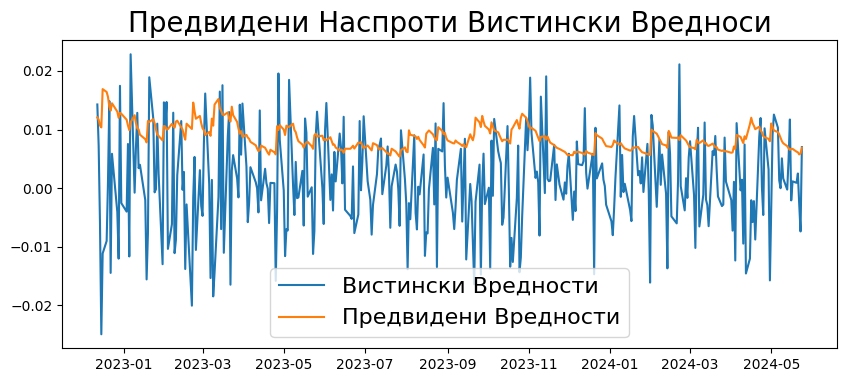

In [40]:
returns = us_stock_close_df['Returns']
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, vol='GARCH', p=1, o=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-test_size:])

plt.figure(figsize=(10, 4))
true, = plt.plot(returns[-test_size:], label='Вистински Вредности')
preds, = plt.plot(rolling_predictions, label='Предвидени Вредности')
plt.title('Предвидени Наспроти Вистински Вредноси', fontsize=20)
plt.legend(fontsize=16)
plt.show()

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003045. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003029. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Pyt

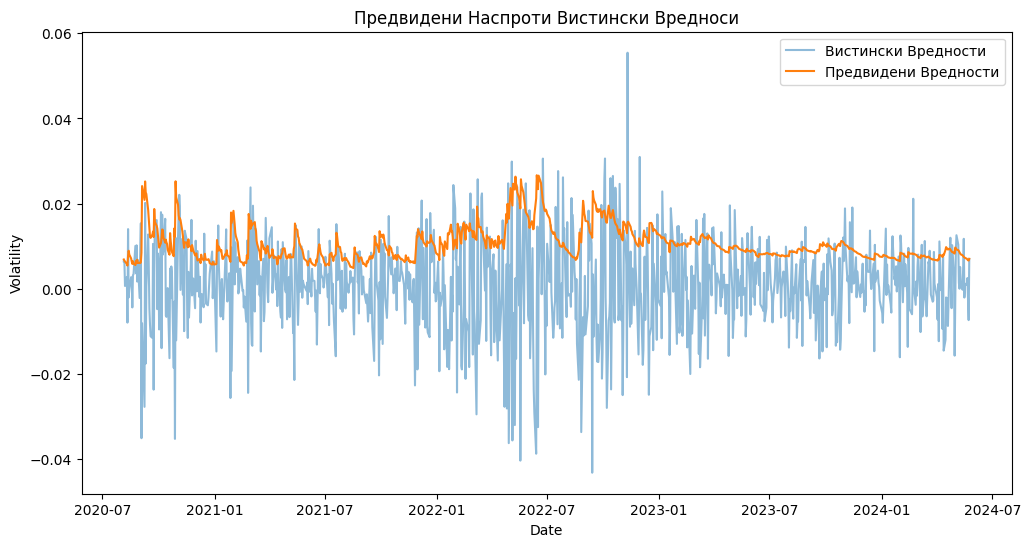

In [41]:
returns = us_stock_close_df['Returns']
window_size = 400
forecast_horizon = 1
n = len(returns)
rolling_volatility_pred = np.zeros(n - window_size)
actual_returns = returns[window_size:]

for i in range(window_size, n):
    train_data = returns[i-window_size:i]
    model = arch_model(train_data, vol='GARCH', p=1, o=1, q=1)
    model_fit = model.fit(disp='off')
    forecast = model_fit.forecast(horizon=forecast_horizon)
    rolling_volatility_pred[i - window_size] = np.sqrt(forecast.variance.values[-1, -1])

rolling_volatility_pred = pd.Series(rolling_volatility_pred, index=returns.index[window_size:])

plt.figure(figsize=(12, 6))
plt.plot(returns.index[window_size:], actual_returns, label='Вистински Вредности', alpha=0.5)
plt.plot(rolling_volatility_pred.index, rolling_volatility_pred, label='Предвидени Вредности')
plt.legend()
plt.title('Предвидени Наспроти Вистински Вредноси')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()